Pytesseract is a Python wrapper for Google's Tesseract-OCR 

In [ ]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


EasyOCR and imutils are two popular Python packages for working with images.

In [ ]:
!pip install easyocr
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.2/608.2 KB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 20.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import time
import pandas as pd

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


converts an image to grayscale using OpenCV

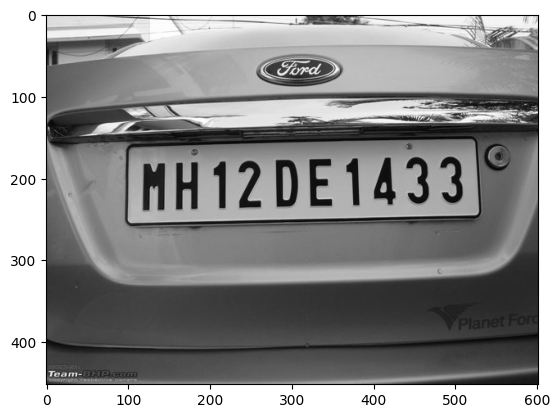

In [ ]:
img = cv2.imread('/content/drive/My Drive/ES_PROJECT/image5.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

Applies bilateral filtering(to reduce noise) and Canny edge detection to a grayscale image using OpenCV

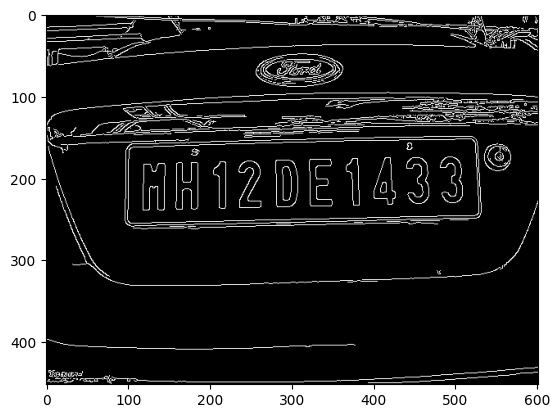

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) 
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

The function takes several arguments, including the input image (edged)

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] # top 10 contours 

To dectect Quadrilateral contour

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:  #quadrilateral contour 
        location = approx
        break

Location of a quadrilateral contour 

In [ ]:
location

array([[[526, 155]],

       [[104, 158]],

       [[ 96, 252]],

       [[525, 249]]], dtype=int32)

To draw the quadrilateral shape onto the binary mask

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1) 
new_image = cv2.bitwise_and(img, img, mask=mask)

Displaying the masked image

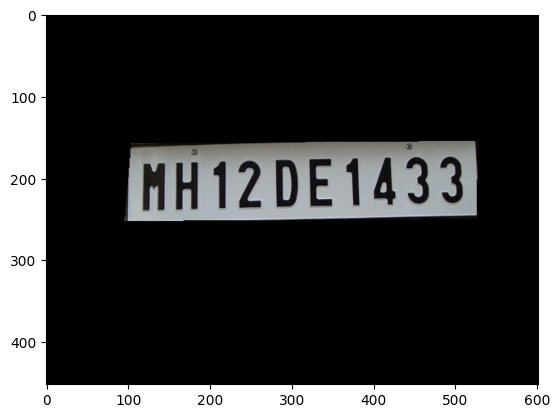

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

Slicing to extract the region of interest from the original image

In [ ]:
(x,y) = np.where(mask==255) #value of 255 (i.e., white pixels)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

Displaying the extracted image

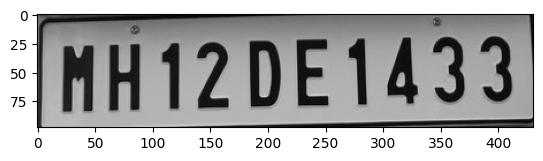

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

optical character recognition (OCR)

In [ ]:
reader = easyocr.Reader(['en']) #EasyOCR reader object
result = reader.readtext(cropped_image)  #function performs OCR on the image
result #text detection results

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[10, 6], [428, 6], [428, 98], [10, 98]],
  'MH12 DE 1433',
  0.44094346865533796)]

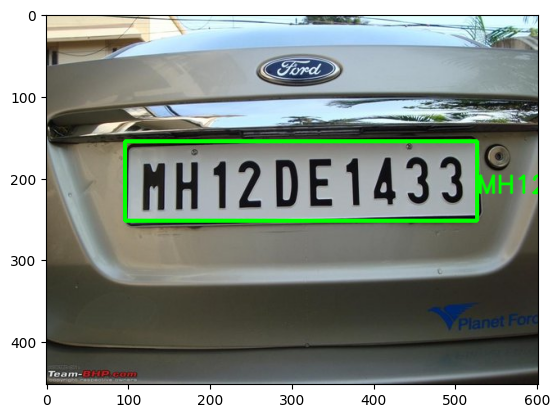

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

Printing the result

In [ ]:
result[0][-2]

'MH12 DE 1433'

Data is stored in CSV file

In [ ]:
raw_data = {'date': [time.asctime( time.localtime(time.time()) )], 
        'v_number': [result[0][-2]]}

df = pd.DataFrame(raw_data, columns = ['date', 'v_number'])
df.to_csv('data.csv')

Downloading the CSV file

In [ ]:
from google.colab import files
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>